In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import wilcoxon
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [2]:
irl = pd.read_csv("ireland.csv")
tr = pd.read_csv("turkiye.csv")

In [3]:
irl.head()
tr.head()

,DATAFLOW,date,unit,net_seg15,train,TIME_PERIOD,OBS_VALUE
0,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_GD,2015,1
1,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_OTH,2015,0
2,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_PAS,2015,1760
3,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10002_NOT_TEN,TRN_GD,2015,520
4,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10002_NOT_TEN,TRN_OTH,2015,6


In [4]:
# Display basic information about the DataFrame
print(tr.info())
print(irl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATAFLOW     2088 non-null   object
 1   date         2088 non-null   object
 2   unit         2088 non-null   object
 3   net_seg15    2088 non-null   object
 4   train        2088 non-null   object
 5   TIME_PERIOD  2088 non-null   int64 
 6   OBS_VALUE    2088 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 114.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATAFLOW     228 non-null    object
 1   date         228 non-null    object
 2   freq         228 non-null    object
 3   unit         228 non-null    object
 4   country      228 non-null    object
 5   net_seg15    228 non-null    object
 6   train        228 non-null    ob

In [5]:
#shows only column names
print(irl.columns)
print(tr.columns)

Index(['DATAFLOW', 'date', 'freq', 'unit', 'country', 'net_seg15', 'train',
       'TIME_PERIOD', 'OBS_VALUE'],
      dtype='object')
Index(['DATAFLOW', 'date', 'unit', 'net_seg15', 'train', 'TIME_PERIOD',
       'OBS_VALUE'],
      dtype='object')


In [6]:
#Basic statistical summaries
print(irl.describe())
print(tr.describe())

       TIME_PERIOD     OBS_VALUE
count   228.000000    228.000000
mean   2012.719298   3865.105263
std       5.598157   5253.962504
min    2005.000000      0.000000
25%    2010.000000    140.000000
50%    2015.000000   1651.000000
75%    2020.000000   5901.000000
max    2020.000000  31005.000000
       TIME_PERIOD     OBS_VALUE
count  2088.000000   2088.000000
mean   2012.327586   1288.035441
std       5.627297   4374.125306
min    2005.000000      0.000000
25%    2005.000000      4.000000
50%    2010.000000    194.000000
75%    2015.000000   1090.750000
max    2020.000000  54613.000000


In [7]:
# Check for missing values
print(tr.isnull().sum())
print(irl.isnull().sum())

DATAFLOW       0
date           0
unit           0
net_seg15      0
train          0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64
DATAFLOW       0
date           0
freq           0
unit           0
country        0
net_seg15      0
train          0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64


In [8]:
# Check Duplicate Values
tr.duplicated().sum()
irl.duplicated().sum()

0

In [9]:
tr.shape
irl.shape

(228, 9)

In [10]:
tr['OBS_VALUE'].value_counts()
irl['OBS_VALUE'].value_counts()

0        48
156       6
936       4
676       4
312       4
         ..
1716      1
9880      1
2340      1
2808      1
16190     1
Name: OBS_VALUE, Length: 111, dtype: int64

<Axes: xlabel='OBS_VALUE'>

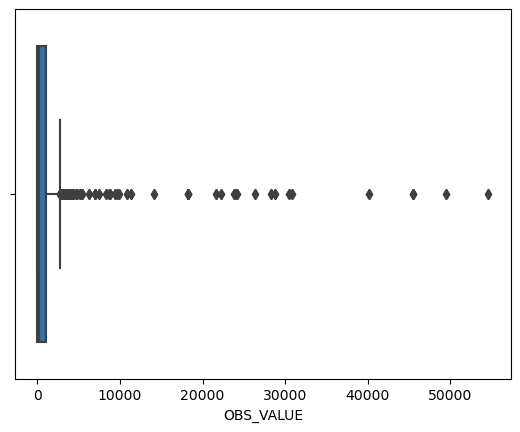

In [11]:
sns.boxplot(x=tr["OBS_VALUE"]) 

<Axes: xlabel='OBS_VALUE'>

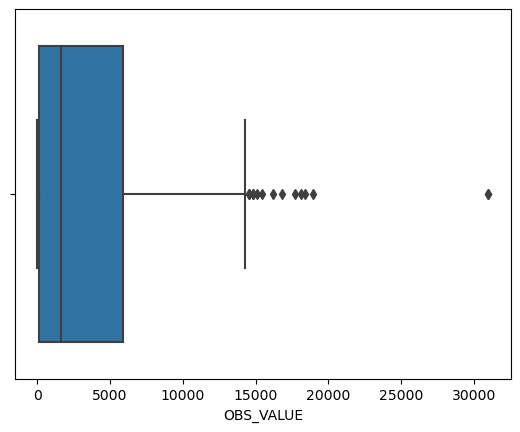

In [12]:
sns.boxplot(x=irl["OBS_VALUE"]) 

In [13]:
turkiye_year_period = tr.groupby('TIME_PERIOD')['OBS_VALUE'].sum()
print(turkiye_year_period)
ireland_year_period = irl.groupby('TIME_PERIOD')['OBS_VALUE'].sum()
print(ireland_year_period)

TIME_PERIOD
2005    772270
2010    611410
2015    600716
2020    705022
Name: OBS_VALUE, dtype: int64
TIME_PERIOD
2005    204256
2010    252369
2015    210224
2020    214395
Name: OBS_VALUE, dtype: int64


In [14]:
tr_mean_val= tr['OBS_VALUE'].mean()
print("Tukiye=", tr_mean_val)
irl_mean_val= irl['OBS_VALUE'].mean()
print("ireland=", irl_mean_val)

Tukiye= 1288.0354406130268
ireland= 3865.1052631578946


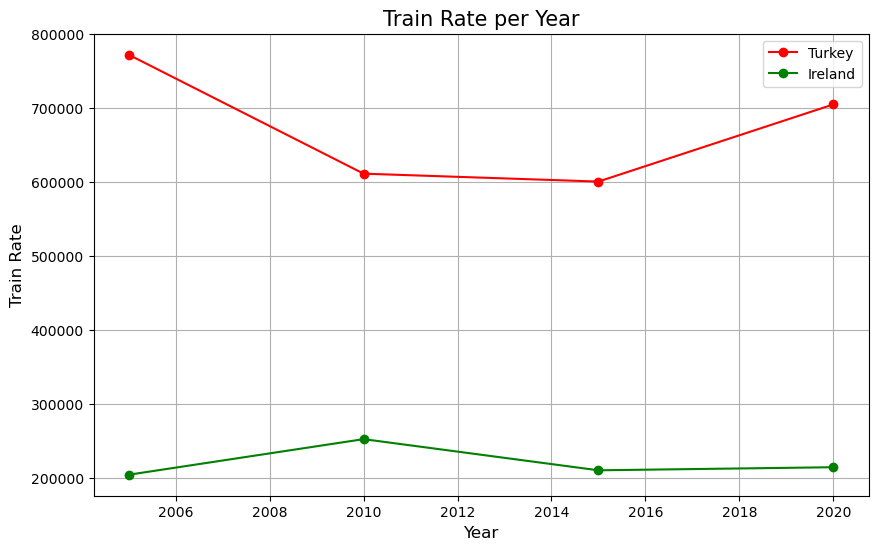

In [15]:
turkiye_year_period = tr.groupby('TIME_PERIOD')['OBS_VALUE'].sum()
ireland_year_period = irl.groupby('TIME_PERIOD')['OBS_VALUE'].sum()

plt.figure(figsize=(10, 6))
turkiye_year_period.plot(kind='line', marker='o', color='red', label='Turkey')
ireland_year_period.plot(kind='line', marker='o', color='green', label='Ireland')
plt.title('Train Rate per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Train Rate', fontsize=12)
plt.grid()
plt.legend()
plt.show()

In [16]:
turkiye_train_year_period = tr.groupby('train')['OBS_VALUE'].sum()
print(turkiye_year_period)
ireland_train_year_period = irl.groupby('train')['OBS_VALUE'].sum()
print(ireland_year_period)

TIME_PERIOD
2005    772270
2010    611410
2015    600716
2020    705022
Name: OBS_VALUE, dtype: int64
TIME_PERIOD
2005    204256
2010    252369
2015    210224
2020    214395
Name: OBS_VALUE, dtype: int64


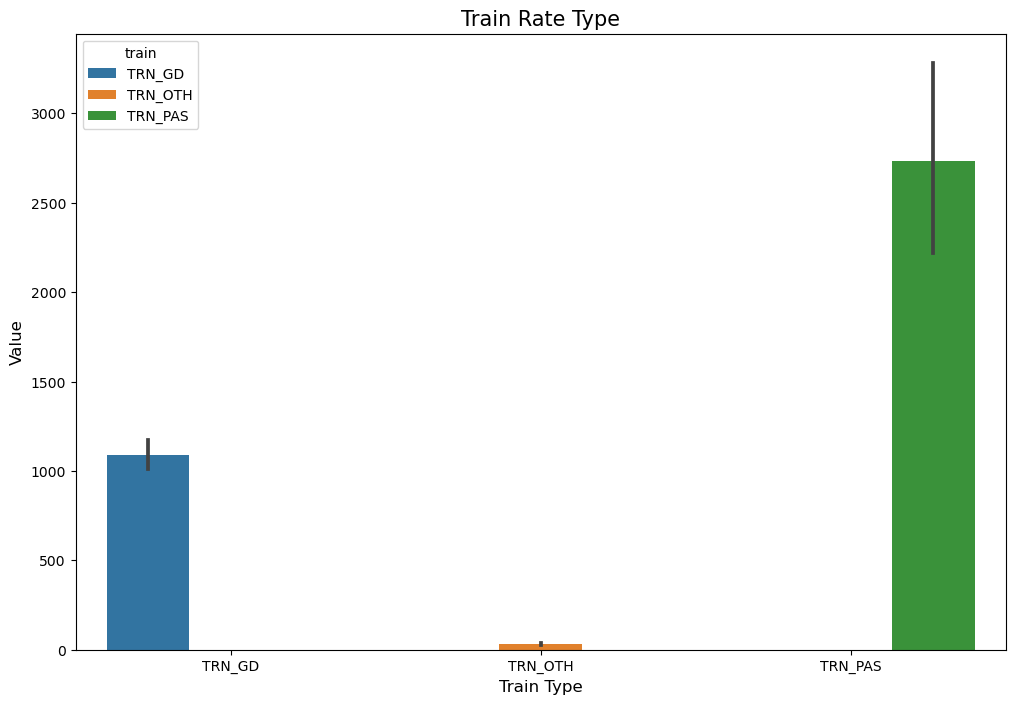

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='train', y='OBS_VALUE', data=tr, hue='train')
plt.title('Train Rate Type', fontsize=15)
plt.xlabel('Train Type', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

In [18]:
total_train=pd.read_csv("trie.csv")

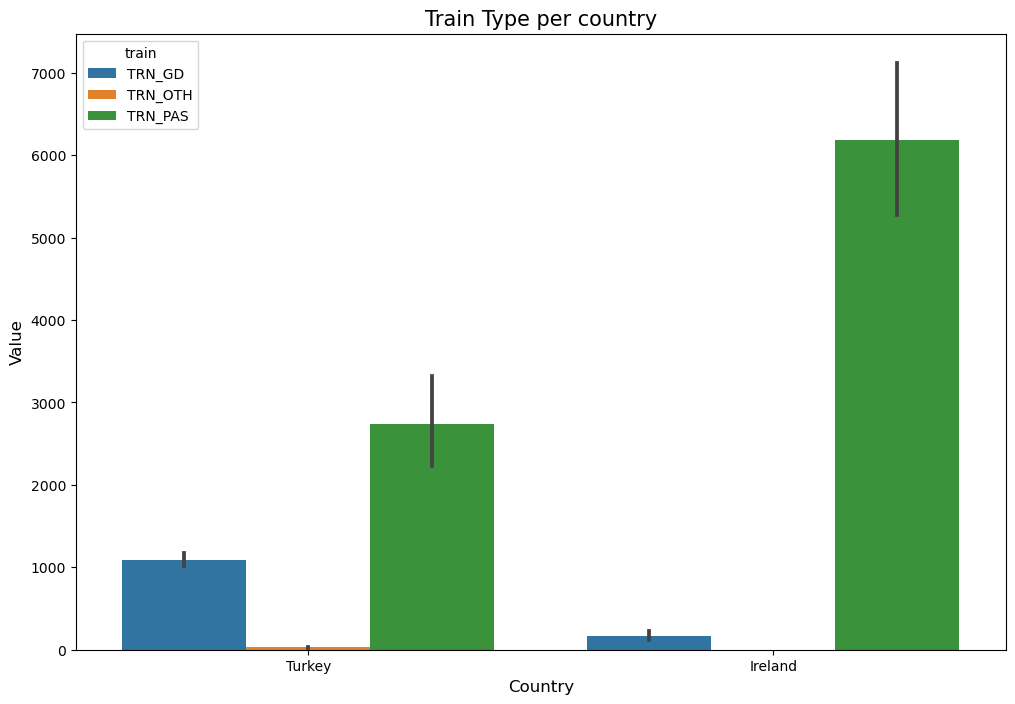

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='OBS_VALUE', data=total_train, hue='train')
plt.title('Train Type per country', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

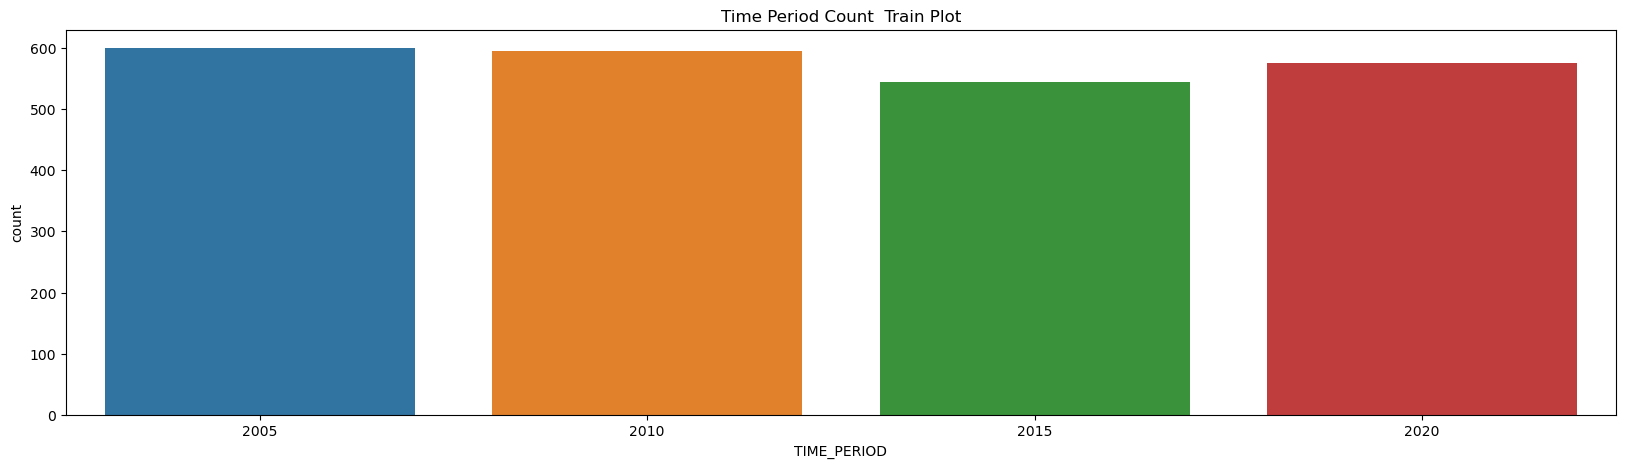

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(total_train,x='TIME_PERIOD');
plt.title('Time Period Count  Train Plot');
plt.show()

In [21]:
##Converting a variable into an integer
total_train['New_train'] =total_train['train'].map({'TRN_GD': 0, 'TRN_OTH': 1 , 'TRN_PAS': 2})
total_train

,DATAFLOW,LAST UPDATE,freq,unit,country,net_seg15,train,TIME_PERIOD,OBS_VALUE,New_train
0,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10001_NOT_TEN,TRN_GD,2015,1,0
1,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10001_NOT_TEN,TRN_OTH,2015,0,1
2,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10001_NOT_TEN,TRN_PAS,2015,1760,2
3,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10002_NOT_TEN,TRN_GD,2015,520,0
4,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10002_NOT_TEN,TRN_OTH,2015,6,1
...,...,...,...,...,...,...,...,...,...,...
2311,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20026_TEN,TRN_GD,2020,0,0
2312,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20027_TEN,TRN_GD,2020,0,0
2313,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20028_TEN,TRN_PAS,2020,6499,2
2314,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20029_TEN,TRN_PAS,2020,5830,2


In [22]:
##Converting a variable into an integer
total_train['New_DATAFLOW'] = total_train['DATAFLOW'].map({'ESTAT:RAIL_TF_NS_TR(1.0)': 0, 'ESTAT:RAIL_TF_NS10_TR(1.0)': 1 , 'ESTAT:RAIL_TF_NS15_TR(1.0)': 2 , 'ESTAT:RAIL_TF_NS20_TR(1.0)': 3 })
total_train

,DATAFLOW,LAST UPDATE,freq,unit,country,net_seg15,train,TIME_PERIOD,OBS_VALUE,New_train,New_DATAFLOW
0,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10001_NOT_TEN,TRN_GD,2015,1,0,2.0
1,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10001_NOT_TEN,TRN_OTH,2015,0,1,2.0
2,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10001_NOT_TEN,TRN_PAS,2015,1760,2,2.0
3,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10002_NOT_TEN,TRN_GD,2015,520,0,2.0
4,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18 11:00:00,A,NR,Turkey,TRS10002_NOT_TEN,TRN_OTH,2015,6,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2311,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20026_TEN,TRN_GD,2020,0,0,NaN
2312,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20027_TEN,TRN_GD,2020,0,0,NaN
2313,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20028_TEN,TRN_PAS,2020,6499,2,NaN
2314,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20029_TEN,TRN_PAS,2020,5830,2,NaN


In [23]:
# Choose Using features
total_train = total_train[['New_DATAFLOW','TIME_PERIOD', 'OBS_VALUE', 'New_train']]
total_train

,New_DATAFLOW,TIME_PERIOD,OBS_VALUE,New_train
0,2.0,2015,1,0
1,2.0,2015,0,1
2,2.0,2015,1760,2
3,2.0,2015,520,0
4,2.0,2015,6,1
...,...,...,...,...
2311,NaN,2020,0,0
2312,NaN,2020,0,0
2313,NaN,2020,6499,2
2314,NaN,2020,5830,2


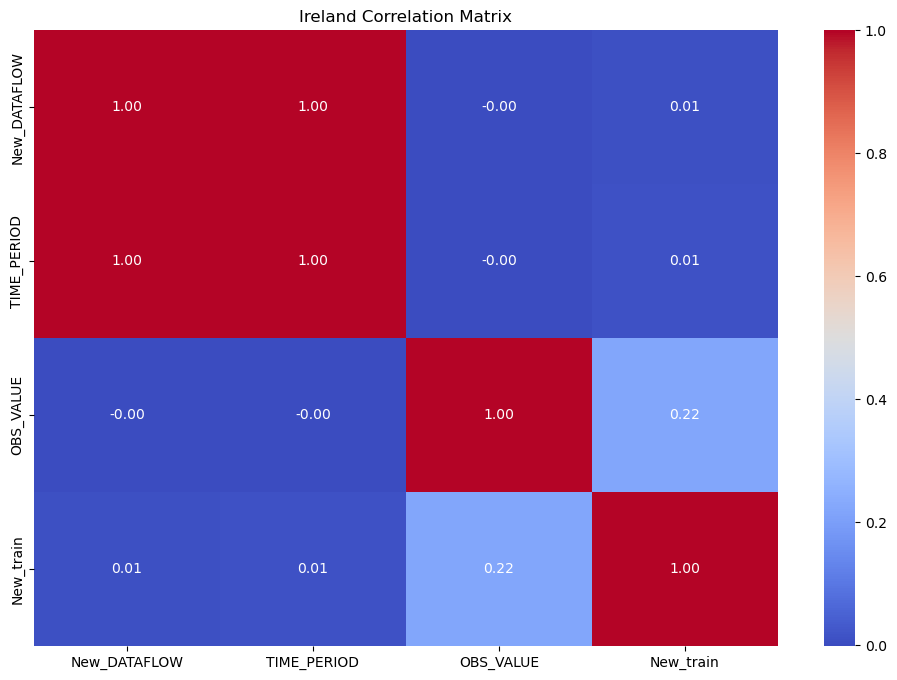

In [24]:
# Correlation matrix visualization
correlation_matrix = total_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ireland Correlation Matrix')
plt.show()

In [25]:
tr = pd.DataFrame(tr)
irl=pd.DataFrame(irl)

# Select the variable whose confidence interval you want to calculate (e.g. 'OBS_VALUE')
variable_of_interest = 'OBS_VALUE'
data_of_interest_tr = tr[variable_of_interest]
data_of_interest_irl = irl[variable_of_interest]


# Calculate confidence interval
confidence_interval_tr = stats.t.interval(0.95, len(data_of_interest_tr)-1, loc=np.mean(data_of_interest_tr), scale=stats.sem(data_of_interest_irl))
confidence_interval_irl = stats.t.interval(0.95, len(data_of_interest_irl)-1, loc=np.mean(data_of_interest_irl), scale=stats.sem(data_of_interest_irl))

print(f"Confidence Interval Turkiye: {confidence_interval_tr}")
print(f"Confidence Interval Irlanda: {confidence_interval_irl}")

Confidence Interval Turkiye: (605.6659858766791, 1970.4048953493746)
Confidence Interval Irlanda: (3179.476126344122, 4550.734399971667)


In [28]:
##Converting a variable into an integer
tr['New_train'] =tr['train'].map({'TRN_GD': 0, 'TRN_OTH': 1 , 'TRN_PAS': 2})
tr

,DATAFLOW,date,unit,net_seg15,train,TIME_PERIOD,OBS_VALUE,New_train
0,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_GD,2015,1,0
1,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_OTH,2015,0,1
2,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_PAS,2015,1760,2
3,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10002_NOT_TEN,TRN_GD,2015,520,0
4,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10002_NOT_TEN,TRN_OTH,2015,6,1
...,...,...,...,...,...,...,...,...
2083,ESTAT:RAIL_TF_NS20_TR(1.0),2/2/2023 0:00,NR,TRS20103_NOT_TEN,TRN_PAS,2020,2920,2
2084,ESTAT:RAIL_TF_NS20_TR(1.0),2/2/2023 0:00,NR,TRS20104_NOT_TEN,TRN_GD,2020,9,0
2085,ESTAT:RAIL_TF_NS20_TR(1.0),2/2/2023 0:00,NR,TRS20104_NOT_TEN,TRN_OTH,2020,27,1
2086,ESTAT:RAIL_TF_NS20_TR(1.0),2/2/2023 0:00,NR,TRS20104_NOT_TEN,TRN_PAS,2020,2846,2


In [29]:
#T-Test:
group1 = tr['OBS_VALUE'][tr['New_train'] == 0]
group2 = tr['OBS_VALUE'][tr['New_train'] == 2]

t_statistic, p_value = ttest_ind(group1, group2)
print(f"Turkiye T-Test Statistic: {t_statistic}")
print(f"Turkiye P-Value: {p_value}")

Turkiye T-Test Statistic: -5.9153136968269475
Turkiye P-Value: 4.1656635147989164e-09


In [30]:
##Converting a variable into an integer
irl['New_train'] =irl['train'].map({'TRN_GD': 0, 'TRN_OTH': 1 , 'TRN_PAS': 2})
irl

,DATAFLOW,date,freq,unit,country,net_seg15,train,TIME_PERIOD,OBS_VALUE,New_train
0,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10001_TEN,TRN_PAS,2010,9650,2
1,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10002_TEN,TRN_PAS,2010,12914,2
2,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10003_TEN,TRN_PAS,2010,3467,2
3,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10004_TEN,TRN_PAS,2010,2177,2
4,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10005_TEN,TRN_PAS,2010,2743,2
...,...,...,...,...,...,...,...,...,...,...
223,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20026_TEN,TRN_GD,2020,0,0
224,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20027_TEN,TRN_GD,2020,0,0
225,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20028_TEN,TRN_PAS,2020,6499,2
226,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20029_TEN,TRN_PAS,2020,5830,2


In [31]:
#T-Test:
group1 = irl['OBS_VALUE'][irl['New_train'] == 0]
group2 = irl['OBS_VALUE'][irl['New_train'] == 2]

t_statistic, p_value = ttest_ind(group1, group2)
print(f"Ireland T-Test Statistic: {t_statistic}")
print(f"Ireland P-Value: {p_value}")

Ireland T-Test Statistic: -10.125079900510945
Ireland P-Value: 4.133932867728425e-20


In [32]:
#Analysis of Variance (ANOVA):
# Sample data frame
group0 = tr['OBS_VALUE'][tr['New_train'] == 0]
group2 = tr['OBS_VALUE'][tr['New_train'] == 2]

# ANOVA
f_statistic, p_value = f_oneway(group1, group2)

print(f"Turkiye ANOVA Statistic: {f_statistic}")
print(f"Turkiye P-Value: {p_value}")

Turkiye ANOVA Statistic: 11.086392171498096
Turkiye P-Value: 0.000910165159571391


In [33]:
#Analysis of Variance (ANOVA):

# Sample data frame
group0 = irl['OBS_VALUE'][irl['New_train'] == 0]
group2 = irl['OBS_VALUE'][irl['New_train'] == 2]

# ANOVA
f_statistic, p_value = f_oneway(group1, group2)

print(f"Ireland ANOVA Statistic: {f_statistic}")
print(f"Ireland P-Value: {p_value}")

Ireland ANOVA Statistic: 102.51724299173065
Ireland P-Value: 4.133932867728579e-20


In [34]:
# Wilcoxon test

# Sample data frame
before = tr['OBS_VALUE'][tr['New_train'] == 0]
after = tr['OBS_VALUE'][tr['New_train'] == 2]

# Check step: Check group lengths
if len(before) != len(after):
    # If lengths are not equal, merge groups by taking minimum length
    min_len = min(len(before), len(after))
    before = before[:min_len]
    after = after[:min_len]

# Wilcoxon test
statistic, p_value = wilcoxon(before, after)

print(f"Turkiye Wilcoxon Statistic: {statistic}")
print(f"Turkiye P-Value: {p_value}")

Turkiye Wilcoxon İstatistiği: 108468.5
Turkiye P-değeri: 0.36133689580650896


In [35]:
# Wilcoxon testi

# Sample data frame
before = irl['OBS_VALUE'][irl['New_train'] == 0]
after = irl['OBS_VALUE'][irl['New_train'] == 2]

# Check step: Check group lengths
if len(before) != len(after):
    # If lengths are not equal, merge groups by taking minimum length
    min_len = min(len(before), len(after))
    before = before[:min_len]
    after = after[:min_len]

# Wilcoxon testi
statistic, p_value = wilcoxon(before, after)

print(f"Ireland Wilcoxon Statistic: {statistic}")
print(f"Ireland P-Value: {p_value}")

Ireland Wilcoxon İstatistiği: 0.0
Ireland P-değeri: 3.7301110259385026e-16


In [36]:
##Converting a variable into an integer
tr['New_DATAFLOW'] = tr['DATAFLOW'].map({'ESTAT:RAIL_TF_NS_TR(1.0)': 0, 'ESTAT:RAIL_TF_NS10_TR(1.0)': 1 , 'ESTAT:RAIL_TF_NS15_TR(1.0)': 2 , 'ESTAT:RAIL_TF_NS20_TR(1.0)': 3 })
tr

,DATAFLOW,date,unit,net_seg15,train,TIME_PERIOD,OBS_VALUE,New_train,New_DATAFLOW
0,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_GD,2015,1,0,2
1,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_OTH,2015,0,1,2
2,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10001_NOT_TEN,TRN_PAS,2015,1760,2,2
3,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10002_NOT_TEN,TRN_GD,2015,520,0,2
4,ESTAT:RAIL_TF_NS15_TR(1.0),28/06/18,NR,TRS10002_NOT_TEN,TRN_OTH,2015,6,1,2
...,...,...,...,...,...,...,...,...,...
2083,ESTAT:RAIL_TF_NS20_TR(1.0),2/2/2023 0:00,NR,TRS20103_NOT_TEN,TRN_PAS,2020,2920,2,3
2084,ESTAT:RAIL_TF_NS20_TR(1.0),2/2/2023 0:00,NR,TRS20104_NOT_TEN,TRN_GD,2020,9,0,3
2085,ESTAT:RAIL_TF_NS20_TR(1.0),2/2/2023 0:00,NR,TRS20104_NOT_TEN,TRN_OTH,2020,27,1,3
2086,ESTAT:RAIL_TF_NS20_TR(1.0),2/2/2023 0:00,NR,TRS20104_NOT_TEN,TRN_PAS,2020,2846,2,3


In [39]:
#Chi-Square Test:

# Sample data frame
observed = pd.crosstab(tr['New_train'], tr['New_DATAFLOW'])

#Chi-Square Test:
chi2_statistic, p_value, _, _ = chi2_contingency(observed)

print(f"Turkey Chi-Square Statistics: {chi2_statistic}")
print(f"Turkey P-value: {p_value}")

Turkey Chi-Square Statistics: 0.24604150361301436
Turkey P-value: 0.9997169667001707


In [38]:
##Converting a variable into an integer
irl['New_DATAFLOW'] = irl['DATAFLOW'].map({'ESTAT:RAIL_TF_NS_IE(1.0)': 0, 'ESTAT:RAIL_TF_NS10_IE(1.0)': 1 , 'ESTAT:RAIL_TF_NS15_IE(1.0)': 2 , 'ESTAT:RAIL_TF_NS20_IE(1.0)': 3 })
irl

,DATAFLOW,date,freq,unit,country,net_seg15,train,TIME_PERIOD,OBS_VALUE,New_train,New_DATAFLOW
0,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10001_TEN,TRN_PAS,2010,9650,2,1
1,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10002_TEN,TRN_PAS,2010,12914,2,1
2,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10003_TEN,TRN_PAS,2010,3467,2,1
3,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10004_TEN,TRN_PAS,2010,2177,2,1
4,ESTAT:RAIL_TF_NS10_IE(1.0),31/03/17 23:00:00,A,NR,Ireland,IES10005_TEN,TRN_PAS,2010,2743,2,1
...,...,...,...,...,...,...,...,...,...,...,...
223,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20026_TEN,TRN_GD,2020,0,0,3
224,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20027_TEN,TRN_GD,2020,0,0,3
225,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20028_TEN,TRN_PAS,2020,6499,2,3
226,ESTAT:RAIL_TF_NS20_IE(1.0),2/2/2023 23:00,A,NR,Ireland,IES20029_TEN,TRN_PAS,2020,5830,2,3


In [40]:
#Chi-Square Test:

# Sample data frame
observed = pd.crosstab(irl['New_train'], irl['New_DATAFLOW'])

#Chi-Square Test:
chi2_statistic, p_value, _, _ = chi2_contingency(observed)

print(f"Ireland Chi-Square Statistics: {chi2_statistic}")
print(f"Ireland P-value: {p_value}")

Ireland Chi-Square Statistics: 0.22110954726718246
Ireland P-value: 0.974111634651164


In [41]:
#PearsonCorrelation

# Sample data frame
variable1 = tr['OBS_VALUE']
variable2 = tr['New_train']

# Correlation test
correlation_coefficient, p_value = pearsonr(variable1, variable2)

print(f"Turkey Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"Turkey P-value: {p_value}")

Turkey Pearson Correlation Coefficient: 0.1543595971492831
Turkey P-value: 1.3245073721005747e-12


In [42]:
#PearsonCorrelation

# Sample data frame
variable1 = irl['OBS_VALUE']
variable2 = irl['New_train']

# Correlation test
correlation_coefficient, p_value = pearsonr(variable1, variable2)

print(f"Ireland Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"Ireland P-value: {p_value}")

Ireland Pearson Correlation Coefficient: 0.5586237223055546
Ireland P-value: 4.1339328677284406e-20


# Machine Learning 

In [43]:
df = pd.DataFrame(tr)
X = tr[['New_DATAFLOW','TIME_PERIOD', 'New_train']]
y = tr[ 'OBS_VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

#Model 2: LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate model performance (R² score used)
rf_r2_score = r2_score(y_test, rf_predictions)
lr_r2_score = r2_score(y_test, lr_predictions)

# Compare results
print(f"Turkey RandomForestRegressor R² Score: {rf_r2_score}")
print(f"Tukiye LinearRegression R² Score: {lr_r2_score}")

Turkey RandomForestRegressor R² Score: -0.0002394474174622907
Tukiye LinearRegression R² Score: -0.005860601865701032


In [44]:
df = pd.DataFrame(tr)
X = irl[['New_DATAFLOW','TIME_PERIOD', 'New_train']]
y = irl[ 'OBS_VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

#Model 2: LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate model performance (R² score used)
rf_r2_score = r2_score(y_test, rf_predictions)
lr_r2_score = r2_score(y_test, lr_predictions)

# Compare results
print(f"Ireland RandomForestRegressor R² Score: {rf_r2_score}")
print(f"Ireland LinearRegression R² Score: {lr_r2_score}")

Ireland RandomForestRegressor R² Score: 0.28988650823211914
Ireland LinearRegression R² Score: 0.2795804568946998


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



# Select properties and target variable
X = tr[['New_DATAFLOW', 'TIME_PERIOD', 'New_train']]
y = tr['OBS_VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor()

# Parameters to use for hyperparameter search
param_grid_rf = {
     'n_estimators': [50, 100, 200],
     'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

# Find the best parameters with GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='r2', cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and R² score
print("Best Params for Random Forest Regressor: ", grid_search_rf.best_params_)
print("Best R² Score for Random Forest Regressor: ", grid_search_rf.best_score_)

# Model 2: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Parameters to use for hyperparameter search
param_grid_gb = {
     'n_estimators': [50, 100, 200],
     'learning_rate': [0.01, 0.1, 0.2],
     'max_depth': [3, 4, 5],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

# Find the best parameters with GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='r2', cv=5)
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and R² score
print("Best Parameters for Turkey Gradient Boosting Regressor: ", grid_search_gb.best_params_)
print("Best R² Score for Turkey Gradient Boosting Regressor: ", grid_search_gb.best_score_)

Best Params for Random Forest Regressor:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best R² Score for Random Forest Regressor:  0.06022395470202493
Best Parameters for Turkey Gradient Boosting Regressor:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score for Turkey Gradient Boosting Regressor:  0.061182222367707054


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



# Select properties and target variable
X = irl[['New_DATAFLOW', 'TIME_PERIOD', 'New_train']]
y = irl['OBS_VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor()

# Parameters to use for hyperparameter search
param_grid_rf = {
     'n_estimators': [50, 100, 200],
     'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

# Find the best parameters with GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='r2', cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and R² score
print("Best Params for Random Forest Regressor: ", grid_search_rf.best_params_)
print("Best R² Score for Random Forest Regressor: ", grid_search_rf.best_score_)

# Model 2: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Parameters to use for hyperparameter search
param_grid_gb = {
     'n_estimators': [50, 100, 200],
     'learning_rate': [0.01, 0.1, 0.2],
     'max_depth': [3, 4, 5],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

# Find the best parameters with GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='r2', cv=5)
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and R² score
print("Best Params for Irish Gradient Boosting Regressor: ", grid_search_gb.best_params_)
print("Best R² Score for Ireland Boosting Regressor: ", grid_search_gb.best_score_)

Best Params for Random Forest Regressor:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best R² Score for Random Forest Regressor:  0.2910243043892235
Best Params for Irish Gradient Boosting Regressor:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score for Ireland Boosting Regressor:  0.2866177963792338


In [47]:
#PCA usage
# Select properties and target variable
X = tr[['New_DATAFLOW', 'TIME_PERIOD', 'New_train']]
y = tr['OBS_VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimension reduction process: use of PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create the model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train_pca, y_train)

# Test the model
y_pred = rf_model.predict(X_test_pca)

# Evaluate model performance (e.g. mean square error used)
mse = mean_squared_error(y_test, y_pred)
print(f" Turkey Model Performance (MSE): {mse}")

# Cross validation process
cross_val_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
avg_cross_val_mse = -cross_val_scores.mean()
print(f"Turkey Cross Validation Average Performance (MSE): {avg_cross_val_mse}")

 Turkey Model Performance (MSE): 9397456.050578455
Turkey Cross Validation Average Performance (MSE): 20373828.30649342


In [48]:
#PCA usage
# Select properties and target variable
X = irl[['New_DATAFLOW', 'TIME_PERIOD', 'New_train']]
y = irl['OBS_VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimension reduction process: use of PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create the model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train_pca, y_train)

# Test the model
y_pred = rf_model.predict(X_test_pca)

# Evaluate model performance (e.g. mean square error used)
mse = mean_squared_error(y_test, y_pred)
print(f" Ireland Model Performance (MSE): {mse}")

# Cross validation process
cross_val_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
avg_cross_val_mse = -cross_val_scores.mean()
print(f"Ireland Cross Validation Average Performance (MSE): {avg_cross_val_mse}")

 Ireland Model Performance (MSE): 25706296.946953658
Ireland Cross Validation Average Performance (MSE): 17844235.69968812


In [ ]:
# Select properties and target variable
X = tr[['New_DATAFLOW', 'TIME_PERIOD', 'New_train']]
y = tr['OBS_VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Turkey R² Score: {r2}")
print(f"Turkiye Mean Squared Error (MSE): {mse}")
print(f"Turkey Mean Absolute Error (MAE): {mae}")

In [49]:
# Select properties and target variable
X = irl[['New_DATAFLOW', 'TIME_PERIOD', 'New_train']]
y = irl['OBS_VALUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Ireland R² Score: {r2}")
print(f"Ireland Mean Squared Error (MSE): {mse}")
print(f"Ireland Mean Absolute Error (MAE): {mae}")

Ireland R² Score: 0.292328451864597
Ireland Mean Squared Error (MSE): 25959159.686605588
Ireland Mean Absolute Error (MAE): 2704.5497635285265
